In [1]:
from sklearn import datasets
import pandas as pd
 
iris_datas = datasets.load_iris()

In [2]:
iris = pd.DataFrame(iris_datas.data, columns=['SpealLength', 'Spealwidth', 'PetalLength', 'PetalLength'])
iris.head()

,SpealLength,Spealwidth,PetalLength,PetalLength
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SpealLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Spealwidth,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
PetalLength,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


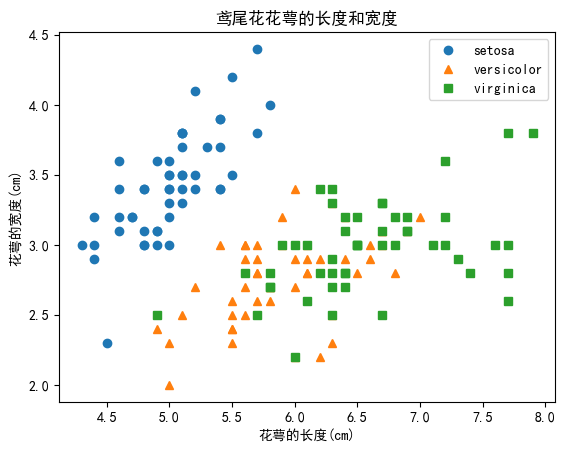

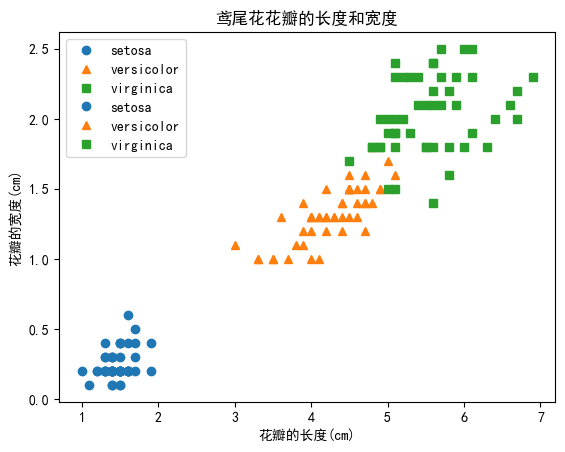

In [4]:
from collections import Counter, defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
 
style_list = ['o', '^', 's']       # 设置点的不同形状，不同形状默认颜色不同，也可自定义
data = iris_datas.data
labels = iris_datas.target_names
cc = defaultdict(list)
 
for i, d in enumerate(data):
    cc[labels[int(i/50)]].append(d) 
p_list = []
c_list = []
 
for each in [0, 2]:
    for i, (c, ds) in enumerate(cc.items()):
        draw_data = np.array(ds)
        p = plt.plot(draw_data[:, each], draw_data[:, each+1], style_list[i])
        p_list.append(p)
        c_list.append(c)
 
    plt.legend(map(lambda x: x[0], p_list), c_list)
    plt.title('鸢尾花花瓣的长度和宽度') if each else plt.title('鸢尾花花萼的长度和宽度')
    plt.xlabel('花瓣的长度(cm)') if each else plt.xlabel('花萼的长度(cm)')
    plt.ylabel('花瓣的宽度(cm)') if each else plt.ylabel('花萼的宽度(cm)')
    plt.show()

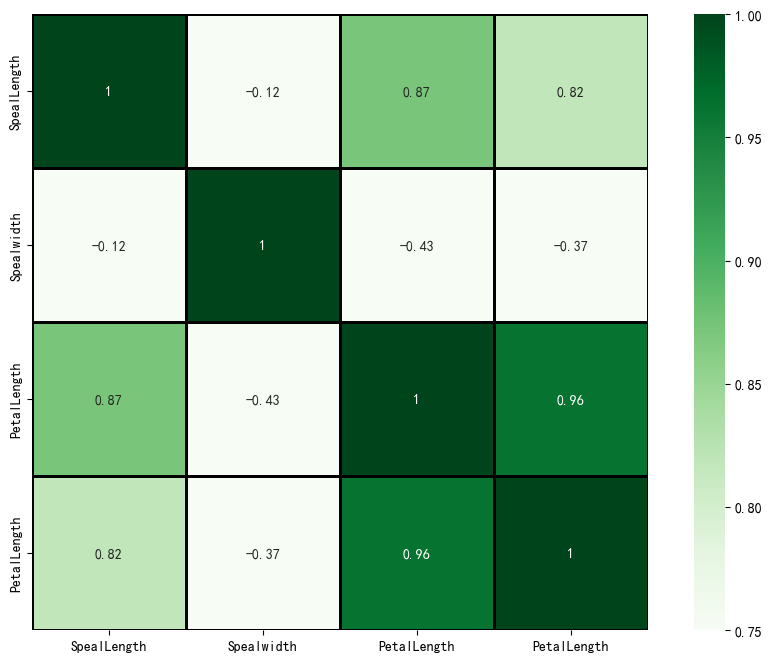

In [5]:
import seaborn as sns
#sns.set(font='SimHei') #设置画图中的中文为黑体
plt.rcParams['axes.unicode_minus']=False 
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig = sns.heatmap(iris.corr(), annot=True, cmap='Greens', linewidths=1, 
                  linecolor='k', square=True, mask=False, vmin=0.75, 
                  cbar_kws={"orientation":"vertical"}, cbar=True)